In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.columns = train.columns.str.lower()
train.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [4]:
print('The dimension of the train dataset is:', train.shape)
print('The dimension of the test dataset is:', test.shape)


The dimension of the train dataset is: (11504798, 12)
The dimension of the test dataset is: (7669866, 11)


In [4]:
display(train.describe())
display(train.describe(include=["O"]))

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07,1.150480e+07
mean,5.752398e+06,3.838356e+01,9.980220e-01,2.641869e+01,4.629966e-01,3.046137e+04,1.124254e+02,1.638977e+02,1.229973e-01
std,3.321149e+06,1.499346e+01,4.443120e-02,1.299159e+01,4.986289e-01,1.645475e+04,5.403571e+01,7.997953e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,2.876199e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527700e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,5.752398e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,8.628598e+06,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945100e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.150480e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


,gender,vehicle_age,vehicle_damage
count,11504798,11504798,11504798
unique,2,3,2
top,Male,1-2 Year,Yes
freq,6228134,5982678,5783229


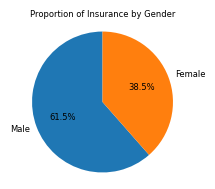

In [4]:
x = train[train['response'] == 1]
y =  x['gender'].value_counts()

fig, ax = plt.subplots(figsize=(2, 2))
ax.pie(y.values, labels=y.index, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 6})


ax.set_title("Proportion of Insurance by Gender", fontsize = 6)
ax.axis('equal')
plt.show()

## Quartile-based Detection

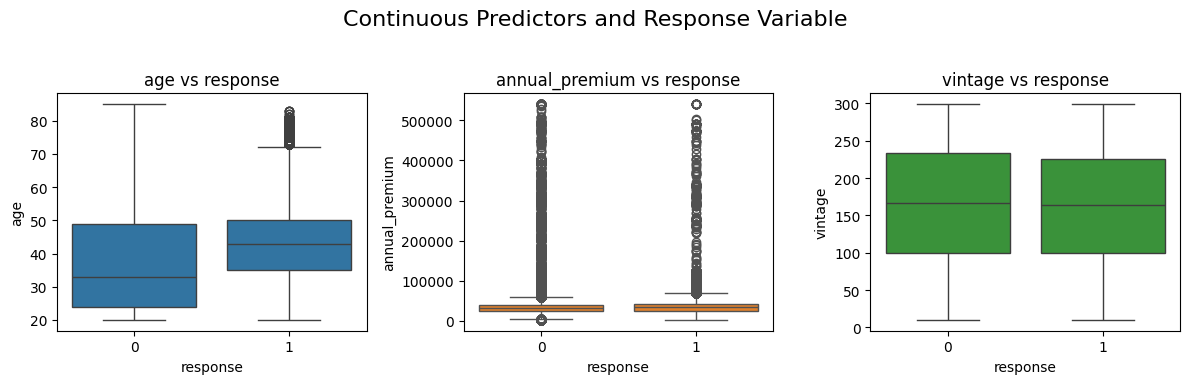

In [5]:
x = train[['age', 'annual_premium', 'vintage']]
y = train['response']

fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(4*len(x.columns), 4))

for i, c in enumerate(x.columns):
    sns.boxplot(x='response', y=c, data=train, ax=axes[i], color=sns.color_palette('tab10')[i])
    axes[i].set_title(f'{c} vs response')

fig.suptitle("Continuous Predictors and Response Variable", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.show()

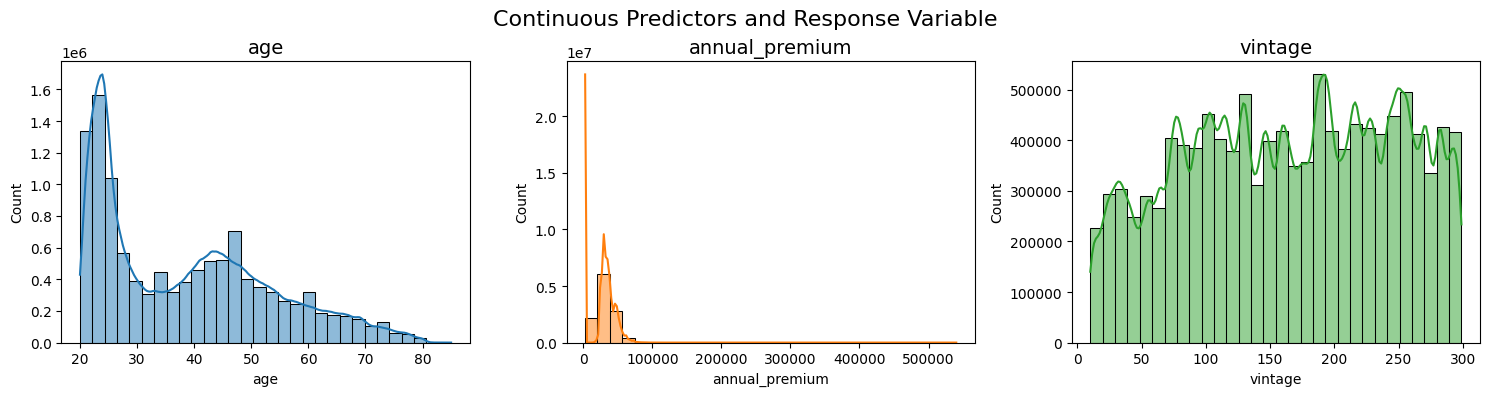

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(5*len(x.columns), 4))

for i, c in enumerate(x.columns):
    sns.histplot(x=c, data=x, kde=True, ax=axes[i], color=sns.color_palette('tab10')[i], bins=30)
    axes[i].set_title(f'{c}', fontsize=14)

fig.suptitle("Continuous Predictors and Response Variable", fontsize=16)
plt.tight_layout()  
plt.subplots_adjust(top=0.85)  # Adjust top to fit suptitle
plt.show()

## Cleaning Outliers
Cleaning outliers of annual_premium 

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [3]:
Q1 = train['annual_premium'].quantile(0.25)
Q3 = train['annual_premium'].quantile(0.75)
IQR = Q3 - Q1

Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

train['annual_premium'] = np.where(train['annual_premium'] > Upper_Whisker, Upper_Whisker, train['annual_premium'])
train['annual_premium'] = np.where(train['annual_premium'] < Lower_Whisker, Lower_Whisker, train['annual_premium'])


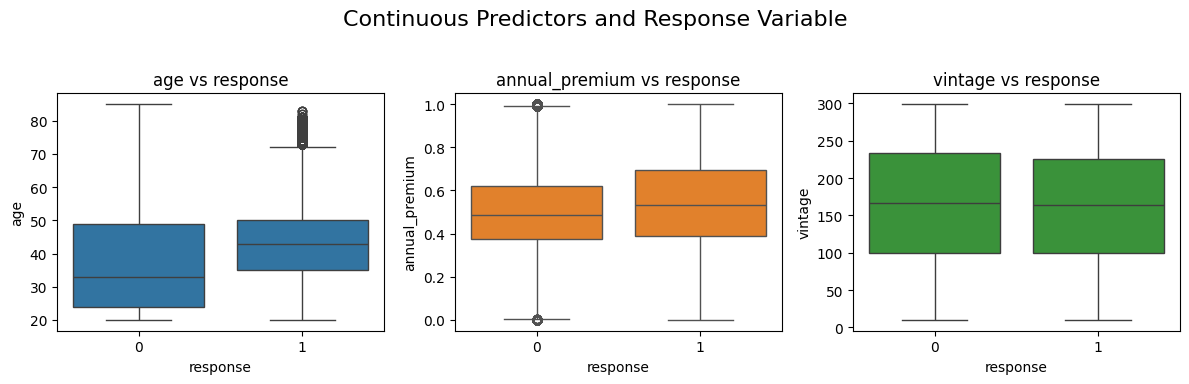

In [44]:
x = train[['age', 'annual_premium', 'vintage']]
y = train['response']

fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(4*len(x.columns), 4))

for i, c in enumerate(x.columns):
    sns.boxplot(x='response', y=c, data=train, ax=axes[i], color=sns.color_palette('tab10')[i])
    axes[i].set_title(f'{c} vs response')

fig.suptitle("Continuous Predictors and Response Variable", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()

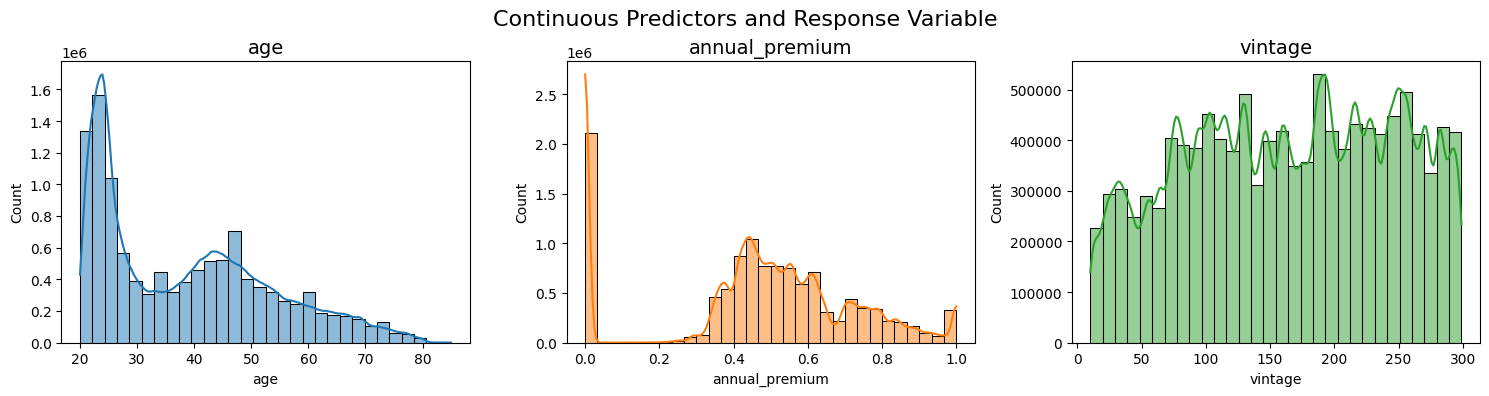

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=len(x.columns), figsize=(5*len(x.columns), 4))

for i, c in enumerate(x.columns):
    sns.histplot(x=c, data=x, kde=True, ax=axes[i], color=sns.color_palette('tab10')[i], bins=30)
    axes[i].set_title(f'{c}', fontsize=14)

fig.suptitle("Continuous Predictors and Response Variable", fontsize=16)
plt.tight_layout()  
plt.subplots_adjust(top=0.85) 
plt.show()

Evaluating Scaling Transformation

In [75]:
numerical_df = train[['annual_premium', 'vintage']]
std_scale = preprocessing.StandardScaler().fit(numerical_df)
numerical_df_scaled['response'] = train['response']


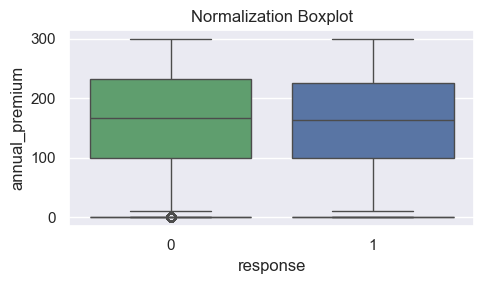

In [72]:
sns.set_theme(style="darkgrid")
my_pal = {0: "g", 1: "b"}
fig, ax = plt.subplots(figsize=(5, 3))
sns.boxplot(x='response', y='annual_premium', data=numerical_df_scaled, hue = 'response', palette= my_pal, legend = False)
            
axes[0].set_title('Normalized Annual Premium vs Response')
axes[0].set_ylabel('Normalized Annual Premium')

sns.boxplot(x='response', y='vintage', data=numerical_df_scaled,hue = 'response', palette= my_pal, legend = False)
axes[1].set_title('Normalized Vintage vs Response')
axes[1].set_ylabel('Normalized Vintage')
plt.title('Normalization Boxplot')
plt.tight_layout()
plt.show()

In [96]:
from sklearn.preprocessing import StandardScaler

In [4]:
num_features = ['annual_premium', 'vintage']
X= train[num_features]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
train_std = pd.DataFrame(X_normalized, columns=num_features, index=train.index)
train[num_features] = train_std
train.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,1.000000,124.0,0.612457,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,0.968234,26.0,0.961938,1
2,2,Female,25,1,14.0,1,< 1 Year,No,0.600166,152.0,0.844291,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,0.000000,156.0,0.228374,0
4,4,Female,36,1,15.0,1,1-2 Year,No,0.492716,152.0,0.982699,0


In [5]:
pd.set_option('display.float_format', '{:.4f}'.format)
train.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000,11504798.0000
mean,5752398.5000,38.3836,0.9980,26.4187,0.4630,0.4676,112.4254,0.5325,0.1230
std,3321149.2555,14.9935,0.0444,12.9916,0.4986,0.2689,54.0357,0.2767,0.3284
min,0.0000,20.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
25%,2876199.2500,24.0000,1.0000,15.0000,0.0000,0.3750,29.0000,0.3080,0.0000
50%,5752398.5000,36.0000,1.0000,28.0000,0.0000,0.4905,151.0000,0.5398,0.0000
75%,8628597.7500,49.0000,1.0000,35.0000,1.0000,0.6250,152.0000,0.7682,0.0000
max,11504797.0000,85.0000,1.0000,52.0000,1.0000,1.0000,163.0000,1.0000,1.0000


## EDA

### Age Exploration

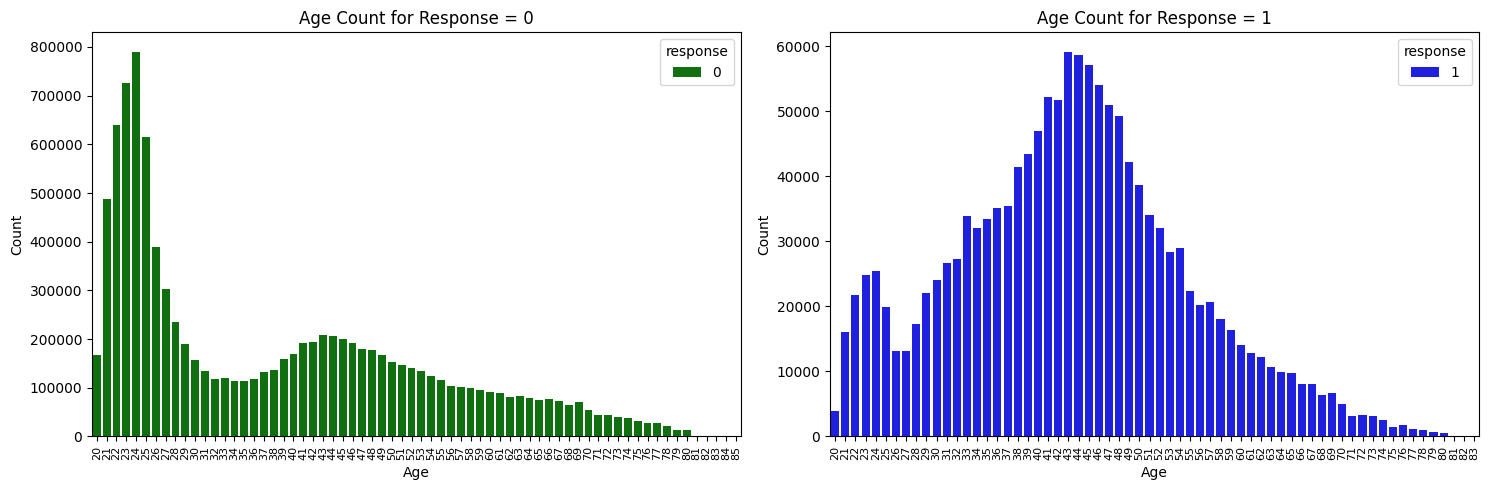

In [6]:
train_response_0 = train[train['response'] == 0]
train_response_1 = train[train['response'] == 1]
my_pal = {0: "g", 1: "b"}
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(x='age', data=train_response_0, ax=axes[0], hue = 'response', palette= my_pal)
axes[0].set_title('Age Count for Response = 0')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Age')
axes[0].tick_params(axis='x', rotation=90, labelsize=8)


sns.countplot(x='age', data=train_response_1, ax=axes[1],  hue = 'response', palette= my_pal)
axes[1].set_title('Age Count for Response = 1')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Age')
axes[1].tick_params(axis='x', rotation=90, labelsize=8)

plt.tight_layout()
plt.show()